# **Project Name**
### **Live Class Monitoring System(Face Emotion Recognition)**
* Author : Pranil Thorat, Jai Harish S, Ashik Kumar, Saransh Srivastava, Bhaskar Subanji

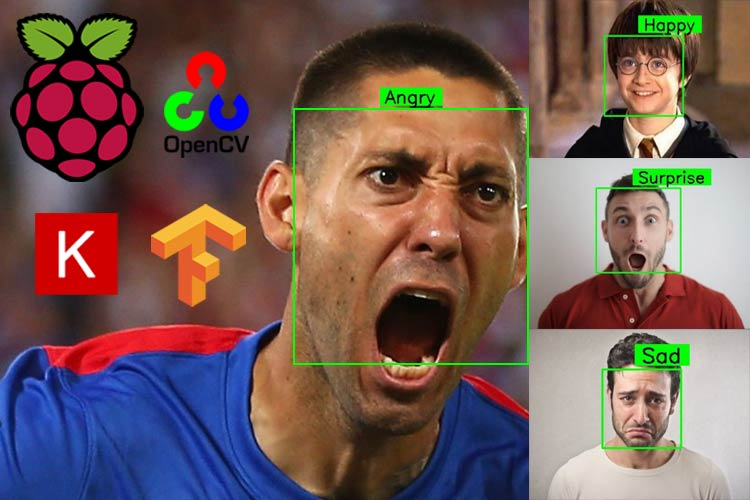

# **Project Introduction**

*   The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms
*   Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms
*   One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge
*   In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention







# **Problem Statements**

# **Our Approch**
**Step 1. Build Model**

We have used **Five different models**  as follows:

    Model 1- Mobilenet Model
    Model 2- Dexpression Model
    Model 3- CNN Model
    Model 4- Densenet Model
    Model 5- Resnet Mode



**Step 2. Real Time Prediction**

And then we perform **Real Time Prediction** on our best model using webcam on Google colab itself.

      - Run webcam on Google Colab
      - Load our best Model
      - Real Time prediction

**Step 3. Deployment**

And lastly we have **deployed** it on **Amazon WEB Services (AWS)**



In [ ]:
!pip install --upgrade pydot --force-reinstall

In [ ]:
!apt-get --reinstall install graphviz

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

#<u>Importing all Necessary Libraries</u>

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
!pip install -U matplotlib


In [ ]:
!pip install -U scikit-learn
#Importing the libraries
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#Importing Libraires required for CNN models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,Callback
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D, SeparableConv2D,Input, GlobalAveragePooling2D,concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.regularizers import l2
# plot_model has been moved to tensorflow.keras.utils in newer versions
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score,classification_report,roc_curve, roc_auc_score,confusion_matrix
# Install the necessary version of scikit-learn to use plot_confusion_matrix
# Import plot_confusion_matrix after installing the updated package
#In the updated versions of scikit-learn, plot_confusion_matrix is deprecated.
#Instead, you should use ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
from sklearn.metrics import ConfusionMatrixDisplay # This import should work now

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121

In [ ]:
#unzip the data
!unzip "/content/drive/MyDrive/Facial_Emotion_capstone_project/archive.zip" -d "/content/face/"

#<u>Loading Datasets</u>

In [ ]:
#Reading data
df=pd.read_csv("/content/drive/MyDrive/fer2013.csv")

In [ ]:
#print first five rows
df.head()

In [ ]:
#shape of the dataset
df.shape

In [ ]:
#checking for null values
df.isnull().sum()


In [ ]:
#emotion class
df.emotion.unique()

In [ ]:
#lable of different emotion
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [ ]:
# Let's plot the count of each set
sns.countplot(df.Usage)
plt.show()

In [ ]:
#plot for value count
sns.countplot(df.emotion)
plt.show()

Our dataset have 7 types of emotion ranging form 0-6:

0.   Anger
1.   Disgust
2.   Fear
3.   Happiness
4.   Sad
5.   Surprise
6.   Neutral

After looking bar plot we can observe that majority of the classes belongs to 3:Happy, 4:Sad and 6:Neutral on the otherside 0:anger, 2: Sad and 5:surprise are avarage and 1:disgust is very low in number

#<u>Display Images</u>

In [ ]:
# size of the image: 48*48 pixels

fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(9):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(9, 9, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

Now prepare data for campatible for neural network

#<u>Defining Parameters</u>

In [ ]:
# Defining the parameters
batch_size = 32
num_epochs = 50
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

#<u>Preprocessing the Data</u>

In [ ]:
#Image preprocessing
df['pixels']=df['pixels'].astype("string")
pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5
faces -= 1.
emotions = pd.get_dummies(df['emotion']).to_numpy()

#<u>Split Data into Training, Validation and Testing </u>

In [ ]:
#Dataset split for training model
X_train, X_valid, y_train, y_valid = train_test_split(faces,emotions,
                                                    shuffle=True,
                                                    test_size=0.2, random_state=42)
X_valid,X_test,y_valid,y_test=train_test_split(faces,emotions,test_size=0.2,shuffle=True)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape,X_test.shape,y_test.shape

In [ ]:
#variable allocation
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

#<u>Performing Data Augmentation</u>

In [ ]:
#data augmentation such as rotate images,shift images,flip and zoom into images
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

#<u>Model Initialization</u>

### **1-Mobilenet:**

* MobileNet is an efficient and portable CNN architecture that is used in real-world applications. MobileNets primarily use depth-separable convolutions in place of the standard convolutions used in earlier architectures to build lighter models
* MobileNets introduces two new global hyperparameters (width multiplier and resolution multiplier) that enable model developers to trade off latency or accuracy for speed and low size based on their needs.

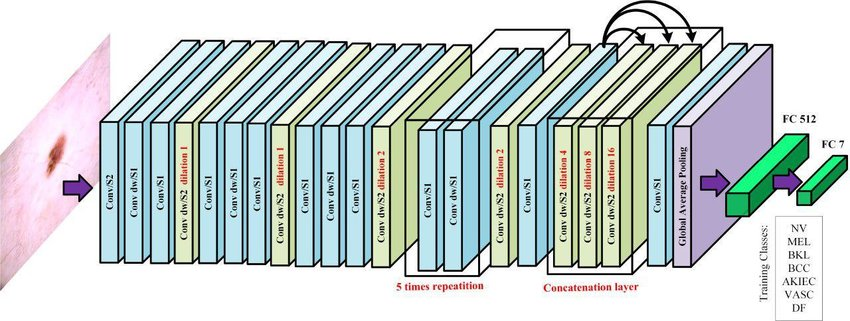

In [ ]:
#defining input_shape,weights and classes for mobilenet model
MobileNet = MobileNet(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)

In [ ]:
#inputs and outputs defining as a mobileNet variable which is defined in previous cell
mobile_model = Model(inputs=MobileNet.input, outputs=MobileNet.output)

In [ ]:
#optimizers,loss and metrics for mobileNet model
optim =optimizers.Adam(learning_rate=0.01)
mobile_model.compile(optimizer=optim,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!pip install graphviz pydot
!apt-get update
!apt-get install -y graphviz

import os
# Check if /usr/bin/dot exists before adding it to PATH
if os.path.exists('/usr/bin/dot'):
    os.environ["PATH"] += os.pathsep + '/usr/bin/dot' # Adds Graphviz to PATH
else:
    print("Graphviz 'dot' executable not found at /usr/bin/dot. Please check your Graphviz installation.")

# Verify if dot is in the PATH
if 'dot' in os.environ.get('PATH', ''):
    print("Graphviz 'dot' executable found in PATH.")
else:
    print("Graphviz 'dot' executable not found in PATH after modification. Please check your system's PATH.")


#defining input_shape,weights and classes for mobilenet model
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.utils import plot_model
from tensorflow import keras
from keras import optimizers


MobileNet = MobileNet(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)
#inputs and outputs defining as a mobileNet variable which is defined in previous cell
mobile_model = Model(inputs=MobileNet.input, outputs=MobileNet.output)
#optimizers,loss and metrics for mobileNet model
optim =optimizers.Adam(learning_rate=0.01)
mobile_model.compile(optimizer=optim,loss='categorical_crossentropy', metrics=['accuracy'])
#plot for architechture
# Wrap in a try-except block to catch potential errors during plotting
try:
    plot_model(mobile_model, to_file='mobile_net.png', show_shapes=True, show_layer_names=True)
    print("Model plotted successfully to mobile_net.png")
except Exception as e:
    print(f"An error occurred while plotting the model: {e}")

In [ ]:
#model compilation
mobile_model.summary()

### **2-Dexpression:**

* The suggested architecture outperforms the current state of the art utilizing CNNs by 99.6 percent for CKP and 98.63 percent for MMI. Face recognition software has a wide range of applications, including human-computer interface and safety systems.
* This is because nonverbal cues are vital types of communication that play an important part in interpersonal interactions.
* The usefulness and dependability of the suggested work for real-world applications is supported by the performance of the proposed architecture.

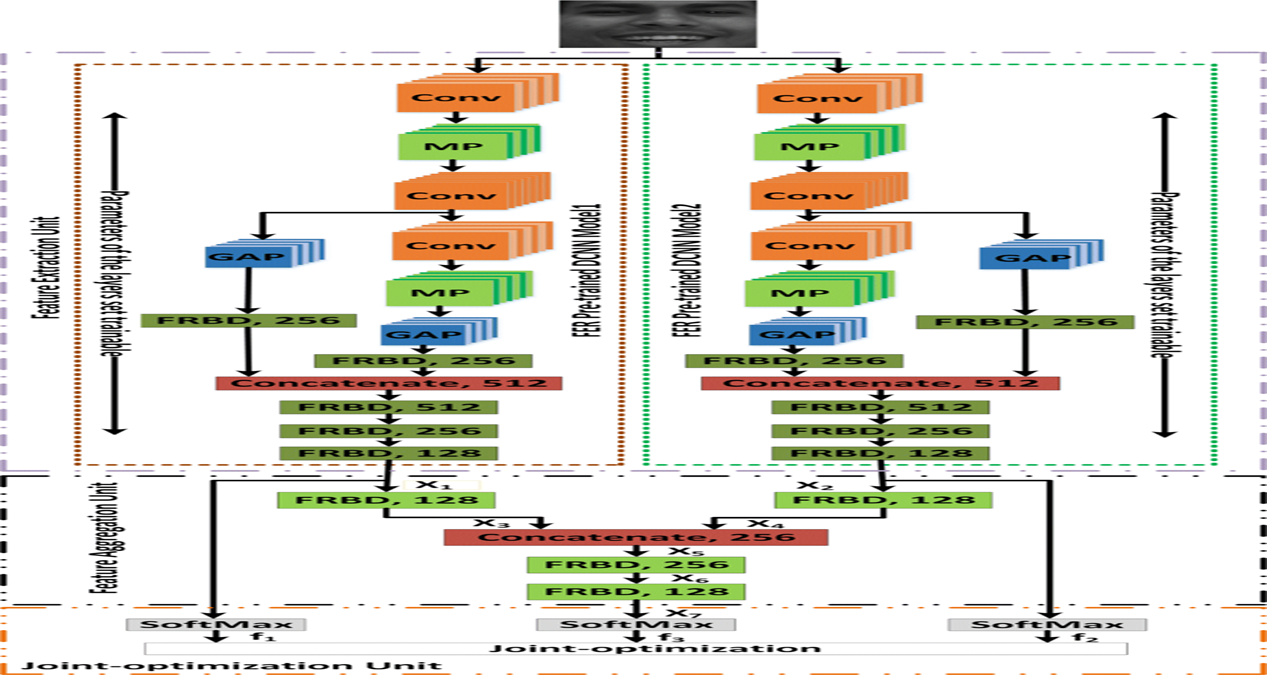

In [ ]:
#function for taking input for the layer
def dexpression():
    inputs = Input(shape=(shape_x, shape_y, 1))

    x = Conv2D(64, 7, strides = 2, padding='same')(inputs)
    x = Activation('relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    x_1 = Conv2D(96, 1, strides = 1, padding='same')(x)
    x_1 = Activation('relu')(x_1)
    x_1 = MaxPooling2D(3, strides=1, padding='same')(x_1)
    x_1 = BatchNormalization()(x_1)

    x_2 = Conv2D(208, 3, strides = 1, padding='same')(x_1)
    x_2 = Activation('relu')(x_2)
    x_2 = MaxPooling2D(3, strides=1, padding='same')(x_2)

    x_3 = Conv2D(64, 1, strides = 1, padding='same')(x_1)
    x_3 = Activation('relu')(x_3)
    x_3 = MaxPooling2D(3, strides=1, padding='same')(x_3)


    x_4=concatenate([x_2,x_3],axis=3)

    x_5 = Conv2D(96, 1, strides = 1, padding='same')(x_4)
    x_5 = Activation('relu')(x_5)
    x_5 = Conv2D(208, 3, strides = 1, padding='same')(x_5)
    x_5 = Activation('relu')(x_5)

    x_6 = MaxPooling2D(3, strides=1, padding='same')(x_4)
    x_6 = Activation('relu')(x_6)
    x_6 = Conv2D(64, 1, strides = 1, padding='same')(x_6)
    x_6 = Activation('relu')(x_6)
    x_6 = MaxPooling2D(3, strides=1, padding='same')(x_6)
    x_7 = concatenate([x_5,x_6],axis=3)

    x_8 = Flatten()(x_7)
    x_8 = Dropout(0.25)(x_8)
    x_8 = Dense(7, activation='softmax')(x_8)
    return Model(inputs, x_8,name='DeXpression')

In [ ]:
#model name
dexpression=dexpression()

In [ ]:
#plot for architechture
plot_model(dexpression, to_file='despression.png', show_shapes=True, show_layer_names=True)

In [ ]:
#model compilation
dexpression.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dexpression.summary()

### **3: CNN :**

* A Convolutional Neural Network (CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

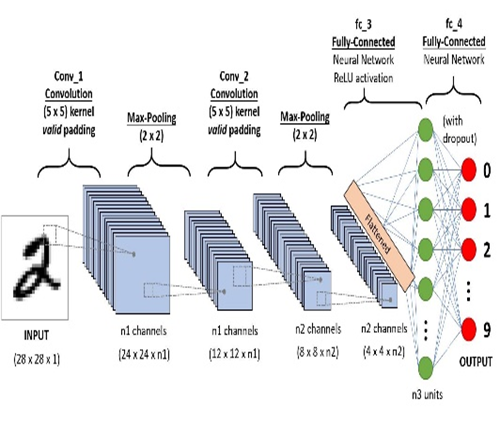

In [ ]:
# Building up Model Architecture
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
#model name
CNN=CNN()

In [ ]:
# Plotting architecture of defined model
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001) #using Adam Optimizer
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

### **4: Densenet :**


* DenseNet was developed specifically to improve the declining accuracy caused by the vanishing gradient in high-level neural networks. In simpler terms, due to the longer path between the input layer and the output layer, the information vanishes before reaching its destination.

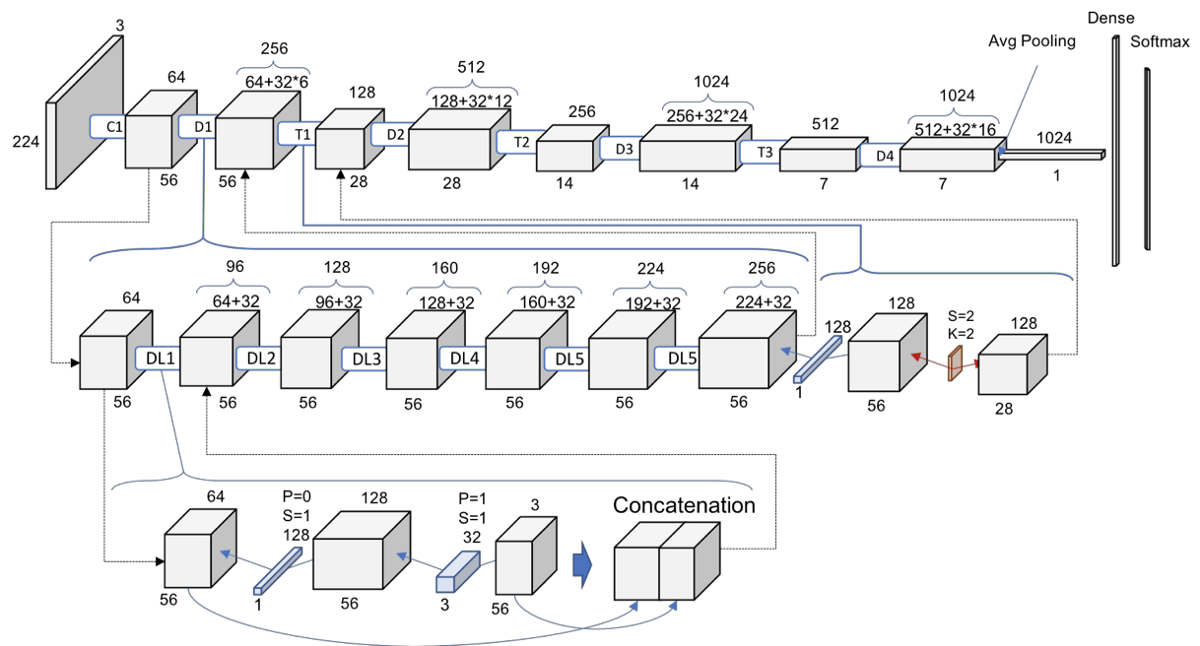

In [ ]:
#optimizers,learning rate,loss and metrics for DenseNet model
DenseNet121 = DenseNet121(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)
dense_net_model = Model(inputs=DenseNet121.input, outputs=DenseNet121.output)
dense_opt= optimizers.Adam(learning_rate=0.01) #using Adam Optimizer
dense_net_model.compile(optimizer=dense_opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Plotting architecture of defined model
plot_model(dense_net_model, to_file='dense_net_model.png', show_shapes=True, show_layer_names=True)

### **5: Resnet :**


* ResNet architecture uses the CNN blocks multiple times, so let us create a class for CNN block, which takes input channels and output channels. There is a batchnorm2d after each conv layer. Then create a ResNet class that takes the input of a number of blocks, layers, image channels, and the number of classes.

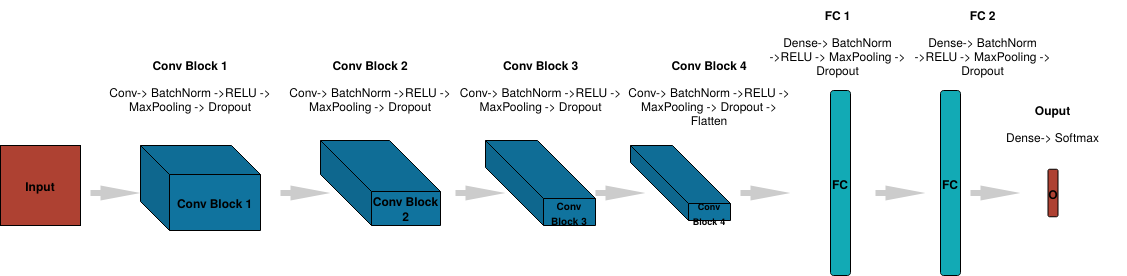

In [ ]:
#Function for building the Residual network
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN). For generalization purpose I used dropouts in regular intervals.
    I used 'ELU' as the activation because it avoids dying relu problem but also performed well as compared to LeakyRelu
    atleast in this case. 'he_normal' kernel initializer is used as it suits ELU. BatchNormalization is also used for better
    results.
    """
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))

    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))

    net.add(Dropout(0.6, name='dropout_4'))

    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )

    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )

    net.summary()

    return net

#<u>Training the Models</u>#


### **1.Mobilenet:**

In [ ]:
#parameters for training the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=50, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'mobilenet'
# Changed 'hdf5' to 'keras' in the model_names definition
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.keras'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
#model history for further evaluation the performance
mobile_history =mobile_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          # Changed steps_per_epoch to use integer division //
          steps_per_epoch=len(X_train) // batch_size,
          epochs=num_epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

Epoch 1/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.2278 - loss: 2.1797
Epoch 1: val_loss improved from inf to 1.80280, saving model to models/mobilenet.01-0.24.keras
897/897 ━━━━━━━━━━━━━━━━━━━━ 477s 490ms/step - accuracy: 0.2278 - loss: 2.1795 - val_accuracy: 0.2416 - val_loss: 1.8028 - learning_rate: 0.0100
Epoch 2/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 6:18 422ms/step - accuracy: 0.4062 - loss: 1.6990
Epoch 2: val_loss did not improve from 1.80280
897/897 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.4062 - loss: 1.6990 - val_accuracy: 0.2368 - val_loss: 1.8050 - learning_rate: 0.0100
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.2632 - loss: 1.7869
Epoch 3: val_loss did not improve from 1.80280
897/897 ━━━━━━━━━━━━━━━━━━━━ 470s 524ms/step - accuracy: 0.2632 - loss: 1.7868 - val_accuracy: 0.2617 - val_loss: 1.8101 - learning_rate: 0.0100
Epoch 4/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 5:48 389ms/step - accuracy: 0.3750 - loss: 1.8428
Epoch 4: val_loss did 

### **2.Dexpression:**

In [ ]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + '_DeXpression'
# Changed '.hdf5' to '.keras' to align with Keras default saving format
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.keras'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
dexpression_history =dexpression.fit(train_datagen.flow(X_train, y_train, batch_size),
          # Perform integer division // to ensure steps_per_epoch is an integer
          steps_per_epoch=len(X_train) // batch_size,
          epochs=num_epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

### **3.CNN:**

In [ ]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'cnn'
# Changed '.hdf5' to '.keras' to align with Keras default saving format
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.keras'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'cnn'
# Changed '.hdf5' to '.keras' to align with Keras default saving format
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.keras'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
# Assuming 'CNN' is your CNN model, as it's defined in the global variables
cnn_history = CNN.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // batch_size,  # Use // for floor division
    epochs=num_epochs,
    callbacks=callbacks,
)

### **4.Densenet:**

In [ ]:
#model parameter for taining the model
early_stop = EarlyStopping('val_loss', patience=100)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'densenet'
# Changed '.hdf5' to '.keras' to align with Keras default saving format
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.keras'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
#model history for the matrics evaluation
dense_net_history =dense_net_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          # Use floor division (//) to ensure 'steps_per_epoch' is an integer
          steps_per_epoch=len(X_train) // batch_size,
          epochs=num_epochs,
          verbose=1,
          callbacks=callbacks,
          validation_data=(X_valid,y_valid))

### **5.Resnet:**

In [ ]:
"""
I used two callbacks one is 'early stopping' for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
#optimizers,learning rate,epsilon defining for Resnet model
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

In [ ]:
# Tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular.
resnet_model = build_net(optims[1])

In [ ]:
#fitting resnet model
resnet_history = resnet_model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // batch_size,  # Use // for floor division to get an integer
    epochs=num_epochs,
    callbacks=callbacks,
)

In [ ]:
#Save best Model
resnet_model.save('final_model.h5')

#<u>Plotting Accuracy and Loss curves</u>


In [ ]:
#all the five models being used
mobile_history,dexpression_history,cnn_history,dense_net_history,resnet_history

In [ ]:
#Plotting accuaracy and loss curves for all models
fig,axes=plt.subplots(5,2,figsize=(25, 25))

for (m,history), ax in zip({'MobileNet':mobile_history,'Dexpression':dexpression_history,'CNN':cnn_history,'DenseNet':dense_net_history,'Resnet':resnet_history}.items(),axes):
  # Loss Curves
  ax[0].plot(history.history['loss'],'r',linewidth=2.0)
  ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
  ax[0].legend(['Training loss', 'Validation Loss'],fontsize=12)
  ax[0].set_xlabel('Epochs ',fontsize=12)
  ax[0].set_ylabel('Loss',fontsize=12)
  ax[0].set_title('Loss Curves '+m,fontsize=12)

  # Accuracy Curves
  ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
  ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
  ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
  ax[1].set_xlabel('Epochs ',fontsize=12)
  ax[1].set_ylabel('Accuracy',fontsize=12)
  ax[1].set_title('Accuracy Curves '+m,fontsize=12)



In [ ]:
#save the accuracy /loss plot
plt.savefig('plots.png')

#<u>Classification Reports</u>


In [ ]:
#all the models that is used stored in model_name variable
model_name=['MobileNet','Dexpression','Custom CNN','DenseNet','Resnet']
iter_=0

In [ ]:
#Classification Reports for all model
for model in [mobile_model,dexpression,CNN,dense_net_model,resnet_model]:
    ypred=model.predict(X_test)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(y_test, axis=1)
    print("-------"+model_name[iter_]+"-------")
    print("\n")
    print(classification_report(ytest_, ypred_,digits=3))
    iter_=iter_+1

#<u>Plotting Confusion Matrix</u>


In [ ]:
#plot confusion matrix
import itertools
for model,i in zip([mobile_model,dexpression,CNN,dense_net_model,resnet_model],[1,2,3,4,5]):
    fig = plt.figure(figsize=(8, 8))

    ypred=model.predict(X_test)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(y_test, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model_name[i-1]


    plt.imshow(cm, interpolation='nearest',cmap='Greens')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()

#<u>Testing the Model using Real Time webcam in Google Colab Notebook</u>

In [ ]:
# Import Libaraires

from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# Saving model in json format along with weights
fer_json = resnet_model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
resnet_model.save_weights("fer.weights.h5") # Changed the filename to fer.weights.h5

In [ ]:
# Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# Defining function to detect face
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Face Detection
  classifier =load_model('/content/final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)





    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
#Finally detecting the face with live webcam
face_detect()

# **CONCLUSION**
* All the models such as  Mobilenet, Dexpression, CNN, Densenet, and ResNet were evaluated.
* The Dcnn (ResNet) model was chosen because it had the highest training accuracy of all the models, and its validation accuracy was nearly 72 percent, which is comparable to CNN models.
* As a result, we save this resnet model and use it to predict facial expressions.
* Since, the emotion counts of disgust and surprise images are less therefore on local webcam it hardly detect those emotions.
* Using streamlit, a front-end model was successfully created and ran on a local webserver.The Streamlit web application has been deployed on Amazon's AWS cloud platform.
* Our github repository contains the code we used to create a web application using Streamlit and deploy it on AWS platforms.
* It was an amazing and fascinating project. This has taught us a lot.
